In [81]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [82]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [83]:
X

array([[-5.24296597, -2.24441602],
       [-5.99612968, -4.27234194],
       [-5.47040454, -3.23993456],
       ...,
       [-5.9619831 , -2.78789359],
       [-2.41670523,  9.98188999],
       [-6.56347689, -4.557906  ]])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [88]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [89]:
from sklearn.cluster import KMeans

In [90]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [91]:
wcss,kmeans.inertia_

([1339.9999999999993,
  671.4541379197967,
  63.54790955835744,
  51.52625089207652,
  44.402554157243785,
  37.75992995730678,
  39.81424495015709,
  27.1874691707691,
  24.586011353338527,
  21.9335656934634],
 21.9335656934634)

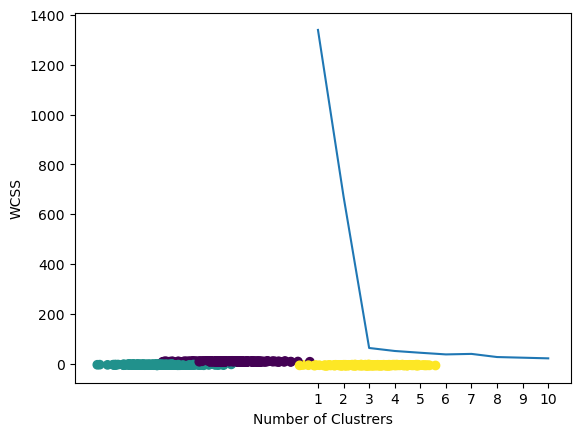

In [92]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [93]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [94]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0,
       2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0,
       2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,

In [95]:
y_pred=kmeans.predict(X_test_scaled)

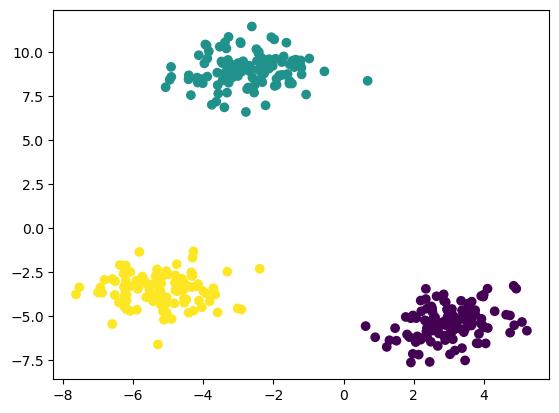

In [96]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

## Validating the k value
## kneelocator


In [97]:
from kneed import KneeLocator

In [98]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [99]:
kl.elbow

3